<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [65]:
from google.colab import drive

In [66]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [68]:
columnname = ['x','y','z']
dataset = pd.read_csv("ex2data1.txt",names=columnname)
dataset


,x,y,z
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [69]:
dataset.describe()


,x,y,z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [70]:
dataset.shape

(100, 3)

In [71]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [72]:
import matplotlib.pyplot as plt
pos,neg = (y==1).reshape(100,1),(y==0).reshape(100,1)

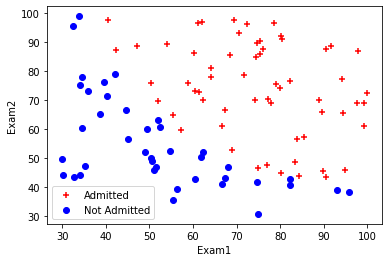

In [73]:
plt.scatter(x[pos[:,0],0],x[pos[:,0],1],color='r',marker='+')
plt.scatter(x[neg[:,0],0],x[neg[:,0],1],color='b',marker='o')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend(['Admitted','Not Admitted'])

In [74]:
def sigmoid(z):
  return(1/(1+np.exp(-z)))


In [75]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std



In [76]:
def costfunction(theta,x,y):
  m=len(y)
  error=0
  prediction=0
  for i in range(m):
    prediction=sigmoid(np.dot(x[i],theta))
    error = error+((-y[i] * np.log(prediction)) - ((1-y[i])*np.log(1-prediction)))

  cost = 1/m * sum(error)
  grad = 1/m * np.dot(x.transpose(),(prediction - y))

  print(cost)
  return cost,grad

In [77]:
m=x.shape[0]
n=x.shape[1]
x,x_norm,x_std=feature_normalization(x)
x=np.append(np.ones((m,1)),x,axis=1)
y=y.reshape(m,1)
intial_theta=np.zeros((n+1,1))
costfunction(intial_theta,x,y)

0.693147180559946


(0.693147180559946, array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [78]:
def gradientDescent(x,y,theta,alpha,num_iters):
  m=len(y)
  cost_function_values=[]

  for i in range(num_iters):
    cost,grad=costfunction(theta,x,y)
    cost_function_values.append(cost)
    theta=theta-(alpha*grad)
    if(i%10==0):
      plt.scatter(x[pos[:,0],0],x[pos[:,0],1],color='r',marker='+')
      plt.scatter(x[neg[:,0],0],x[neg[:,0],1],color='b',marker='o')
      x_value= np.array([np.min(x[:,1]),np.max(x[:,1])])
      y_value=-(theta[0] +theta[1]*x_value)/theta[2]
      plt.plot(x_value,y_value,"g")
      plt.xlabel('Exam1')
      plt.ylabel('Exam2')
      plt.legend(['Admitted','Not Admitted'])
      plt.show()
  return theta,cost_function_values

0.693147180559946


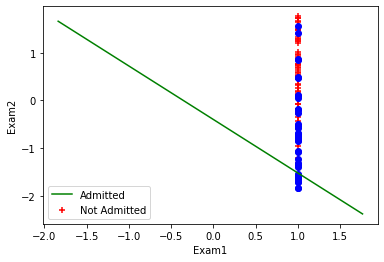

0.6916282011267486
0.69011430597859
0.6886054814428759
0.6871017139486074
0.6856029900263095
0.6841092963079416
0.682620619526783
0.681136946517292
0.679658264214948
0.6781845596560636


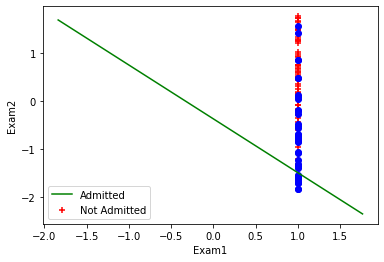

0.6767158199775818
0.6752520324168454
0.6737931843113499
0.6723392630984713
0.670890256315177
0.6694461515977141
0.6680069366812793
0.6665725993996674
0.6651431276849047
0.66371850956686


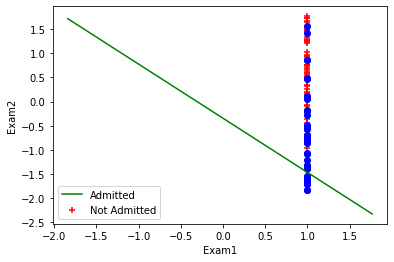

0.6622987331728385
0.6608837867271605
0.6594736585507195
0.6580683370605245
0.6566678107692269
0.6552720682846288
0.6538810983091797
0.6524948896394522
0.651113431165609
0.6497367118708491


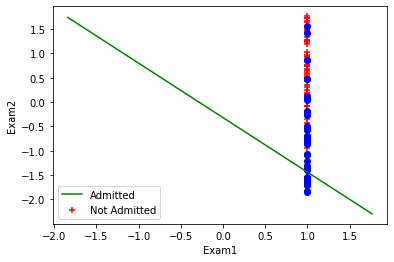

0.6483647208308466
0.6469974472131689
0.6456348802766868
0.6442770093709698
0.6429238239356666
0.6415753134998796
0.640231467681518
0.6388922761866507
0.6375577288088379
0.63622781542846


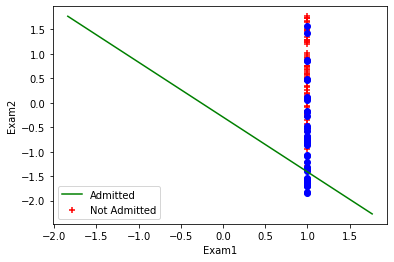

0.634902526012029
0.6335818506114977
0.6322657793635525
0.6309543024889013
0.6296474102915497
0.6283450931580724
0.6270473415568707
0.625754146037429
0.6244654972295579
0.623181385842635


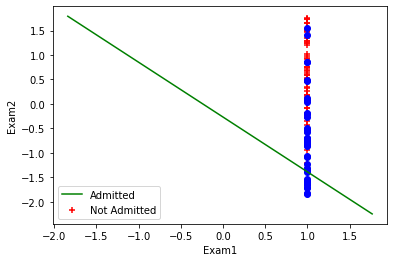

0.6219018026648344
0.6206267385623536
0.6193561844786324
0.6180901314335666
0.6168285705227154
0.6155714929165057
0.6143188898594281
0.6130707526692329
0.6118270727361178
0.6105878415219151


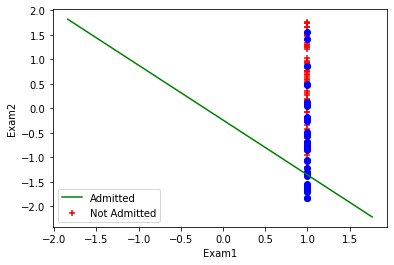

0.6093530505592714
0.6081226914508292
0.6068967558684019
0.6056752355521445
0.6044581223097274
0.6032454080155037
0.602037084609677
0.600833144097464
0.5996335785482613
0.5984383800948074


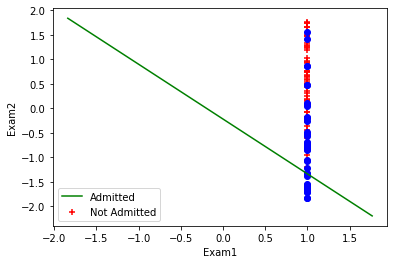

0.5972475409323438
0.5960610533177778
0.5948789095688437
0.5937011020632629
0.5925276232379078
0.5913584655879615
0.5901936216660815
0.5890330840815644
0.5878768454995086
0.5867248986399823


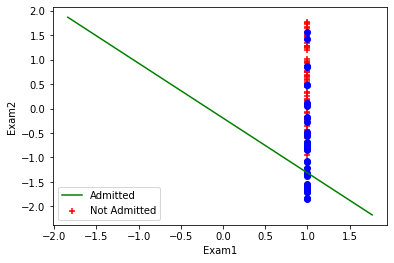

0.5855772362771909
0.5844338512386462
0.5832947364043379
0.5821598847059086
0.5810292891258297
0.579902942696579
0.5787808384998246
0.5776629696656084
0.5765493293715348
0.5754399108419602


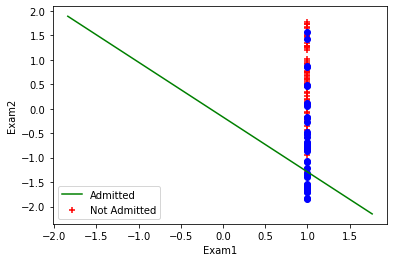

0.5743347073471907
0.5732337122026773
0.5721369187682227
0.5710443204471836
0.5699559106856823
0.5688716829718244
0.5677916308349151
0.5667157478446844
0.5656440276105162
0.5645764637806823


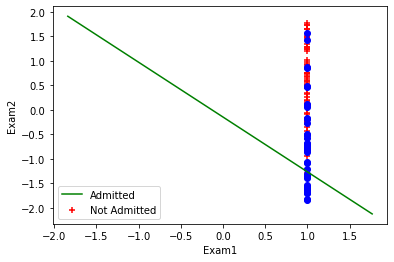

0.5635130500415807
0.5624537801169803
0.5613986477672684
0.5603476467887092
0.5593007710126987
0.5582580143050357
0.5572193705651914
0.5561848337255851
0.5551543977508703
0.5541280566372235


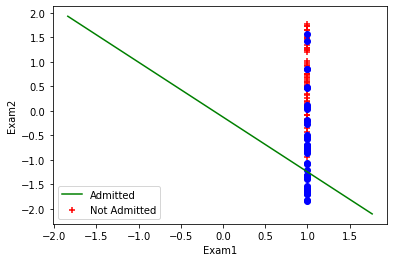

0.5531058044116393
0.5520876351312323
0.5510735428825457
0.5500635217808659
0.5490575659695435
0.5480556696193197
0.5470578269276629
0.5460640321181074
0.5450742794396032
0.5440885631658676


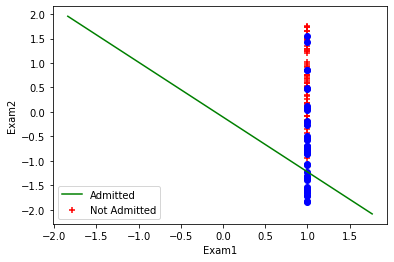

0.5431068775947494
0.5421292170475959
0.5411555758686273
0.5401859484243208
0.5392203291027979
0.5382587123132231
0.5373010924852053
0.53634746406821
0.5353978215309761
0.5344521593609423


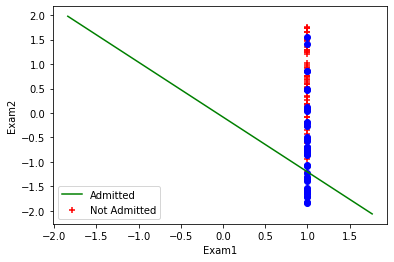

0.5335104720636784
0.5325727541623259
0.5316390001970434
0.5307092047244637
0.529783362317154
0.5288614675630827
0.5279435150651002
0.527029499440419
0.5261194153201066
0.5252132573485837


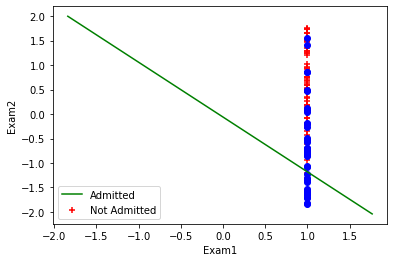

0.5243110201831293
0.5234126984933947
0.5225182869609233
0.5216277802786802
0.5207411731505853
0.5198584602910571
0.5189796364245611
0.5181046962851709
0.5172336346161271
0.5163664461694135


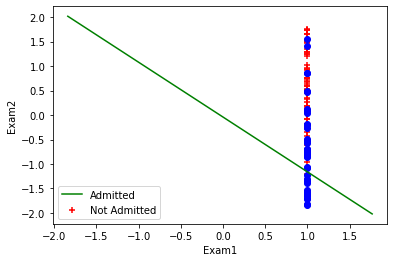

0.5155031257053344
0.5146436679921
0.5137880678054213
0.5129363199281094
0.5120884191496845
0.5112443602659884
0.5104041380788088
0.5095677473955069
0.5087351830286533
0.5079064397956708


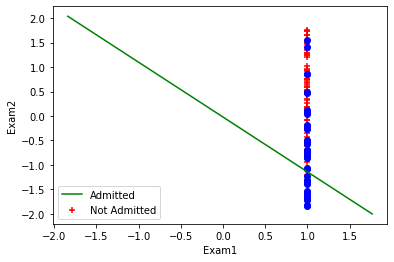

0.5070815125184849
0.5062603960231781
0.5054430851396565
0.5046295747013182
0.5038198595447299
0.5030139345093118
0.5022117944370276
0.5014134341720806
0.5006188485606176
0.49982803245044055


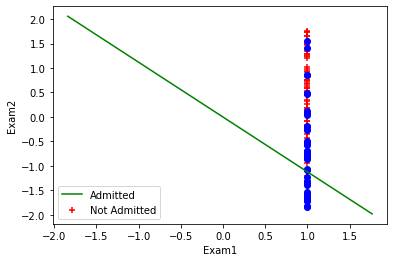

0.49904098069072034
0.49825768813172167
0.4974781496245312
0.49670236002079426
0.49593031417245514
0.49516200693150647
0.4943974331497426
0.4936365876785193
0.49287946536852273
0.49212606106953716


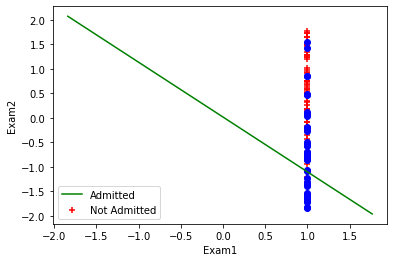

0.49137636963022685
0.49063038589791874
0.48988810471839167
0.48914952093567227
0.4884146293918365
0.48768342492681627
0.48695590237821146
0.48623205658110624
0.4855118823678964
0.4847953745681131


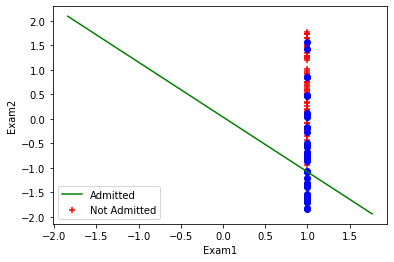

0.4840825280082595
0.48337333751165007
0.48266779789825265
0.4819659039845399
0.48126765058334253
0.4805730325037096
0.47988204455077144
0.4791946815256103
0.47851093822513335
0.47783080944195044


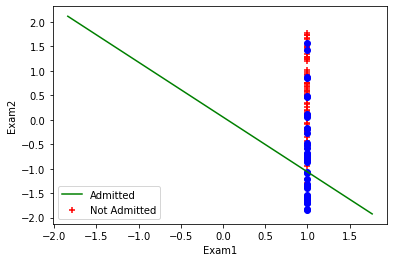

0.4771542899642608
0.4764813745757365
0.47581205805541743
0.47514633517760796
0.47448420071177794
0.47382564942246824
0.47317067606920077
0.4725192754063928
0.4718714421832743
0.47122717114381146


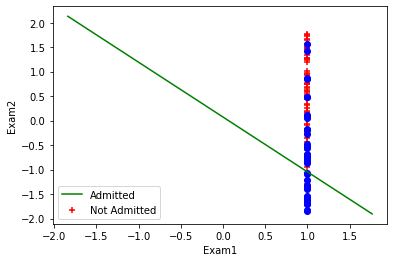

0.47058645702663204
0.4699492945649578
0.4693156784865346
0.4686856035135749
0.46805906436269673
0.46743605574487057
0.46681657236536767
0.46620060892371407
0.46558816011364507
0.46497922062306724


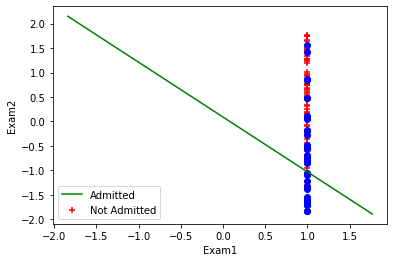

0.4643737851340196
0.4637718483226413
0.4631734048591406
0.4625784494077698
0.4619869766267992
0.46139898116849754
0.4608144576791145
0.4602334007988659
0.45965580516192206
0.4590816653963989


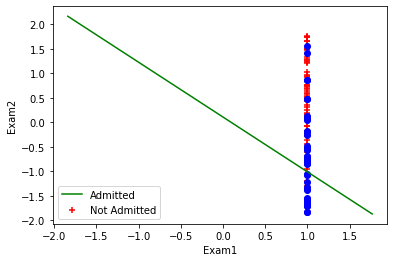

0.4585109761243529
0.4579437319617777
0.45737992751860157
0.4568195573986933
0.4562626161998641
0.45570909851387753
0.4551589989264565
0.4546123120172992
0.45406903236009066
0.4535291545225222


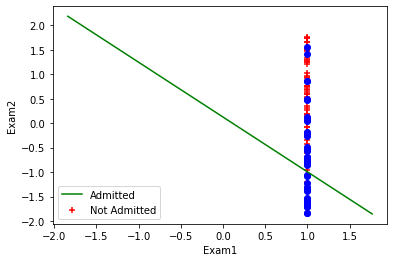

0.45299267306631036
0.4524595825472183
0.45192987751507996
0.4514035525138263
0.4508806020815135
0.4503610207503537
0.4498448030467467
0.4493319434913148
0.44882243659893833
0.44831627687879483


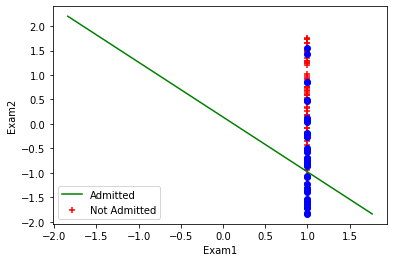

0.44781345883439844
0.4473139769636415
0.4468178257588382
0.44632499970677003
0.4458354932887329
0.44534930098058384
0.4448664172527944
0.44438683657049866
0.44391055339354896
0.44343756217656916


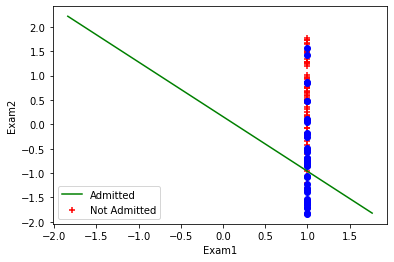

0.44296785736901156
0.4425014334152125
0.44203828475445406
0.44157840582102054
0.44112179104426275
0.4406684348486587
0.44021833165387775
0.43977147587484644
0.4393278619218136
0.4388874842004164


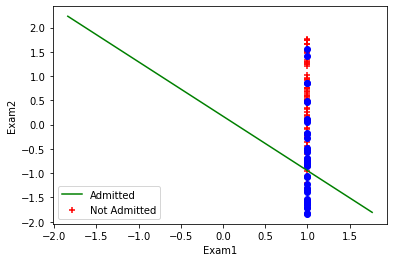

0.4384503371117504
0.4380164150524386
0.4375857124146998
0.4371582235864213
0.4367339429512309
0.43631286488856885
0.4358949837737626
0.4354802939781008
0.4350687898689091
0.43466046580962653


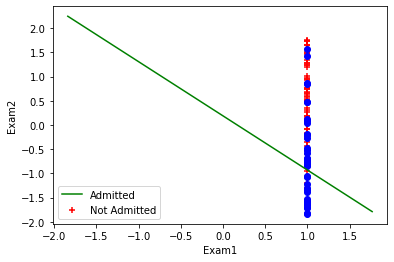

0.434255316159882
0.4338533352755723
0.4334545175089401
0.43305885720865356
0.43266634871988546
0.43227698638439366
0.43189076454060277
0.43150767752368313
0.43112771966563584
0.430750885295374


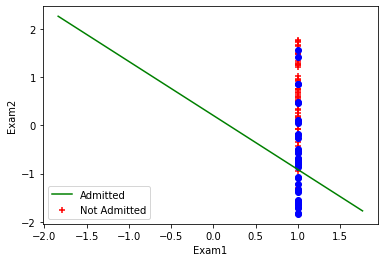

0.430377168738804
0.4300065643189117
0.42963906635584453
0.4292746691669963
0.4289133670670912
0.4285551543682702
0.4282000253801742
0.4278479744100331
0.42749899576274814
0.4271530837409805


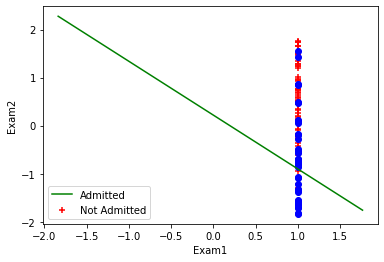

0.42681023264523704
0.42647043677395713
0.4261336904236002
0.42579998788873213
0.4254693234621134
0.4251416914347869
0.4248170860961637
0.4244955017341135
0.42417693263505213
0.4238613730840277


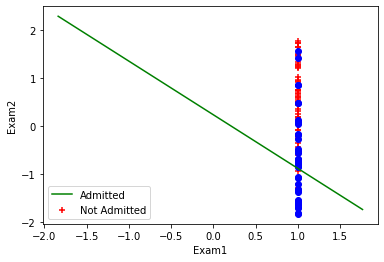

0.42354881736481115
0.42323925975998317
0.4229326945510234
0.4226291160183978
0.4223285184416474
0.4220308960994777
0.42173624326984527
0.421444554230048
0.42115582325681167
0.42087004462637934


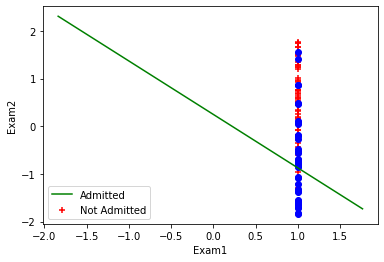

0.4205872126145995
0.4203073214970143
0.4200303655489464
0.41975633904558934
0.4194852362620929
0.4192170514736525
0.418951778955597
0.4186894129834737
0.41842994783313864
0.41817337778084257


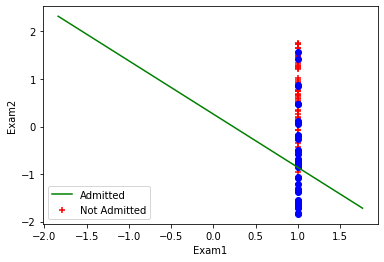

0.41791969710331806
0.4176689000778652
0.4174209809824405
0.41717593409574105
0.41693375369729163
0.416694434067531
0.4164579694878973
0.4162243542409129
0.4159935826102708
0.41576564888091894


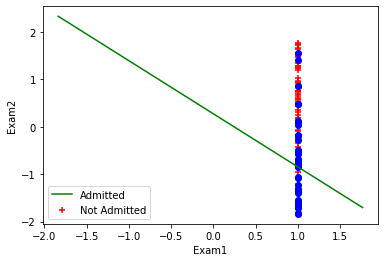

0.41554054733914497
0.4153182722726602
0.41509881797068465
0.4148821787240307
0.41466834882518555
0.4144573225683964
0.4142490942497512
0.4140436581672633
0.4138410086209524
0.4136411399129266


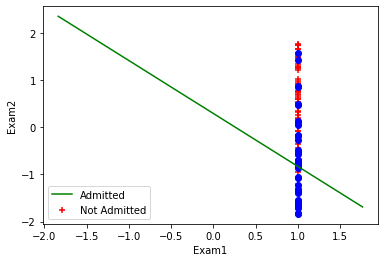

0.41344404634746507
0.41324972223109746
0.41305816187268724
0.41286935958350995
0.4126833096773346
0.4125000064705033
0.41231944428201056
0.41214161743358285
0.41196652024975683
0.4117941470579575


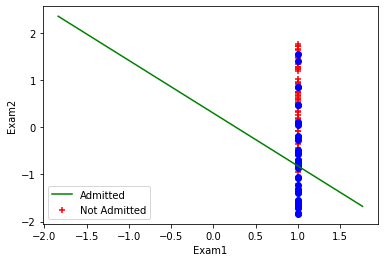

0.4116244921885763
0.4114575499750492
0.4112933147539329
0.4111317808649818
0.41097294265122514
0.4108167944590407
0.41066333063823385
0.4105125455421083
0.41036443352754426
0.4102189889550707


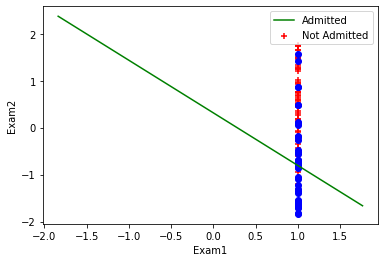

0.41007620618893936
0.40993607959719913
0.40979860355176706
0.4096637724285029
0.40953158060727923
0.40940202247205404
0.40927509241094184
0.4091507848162835
0.4090290940847172
0.4089100146172482


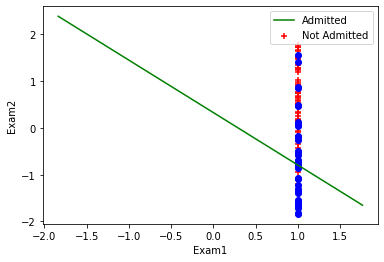

0.40879354081931674
0.4086796671008689
0.408568387876424
0.40845969756514144
0.40835359059088966
0.40825006138231223
0.40814910437289476
0.4080507140010299
0.40795488471008406
0.40786161094846207


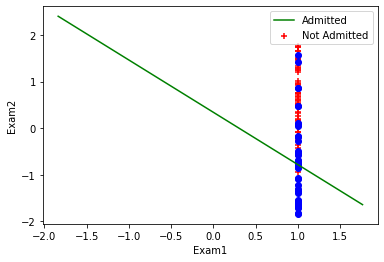

0.40777088716967125
0.40768270783238564
0.4075970674005101
0.4075139603432427
0.4074333811351381
0.40735532425616877
0.4072797841917873
0.40720675543298734
0.40713623247636443
0.40706820982417574


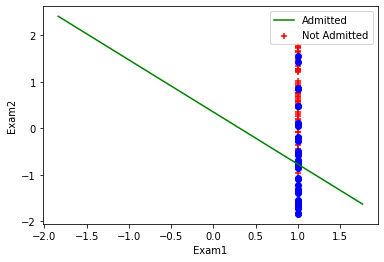

0.4070026819844009
0.40693964347079936
0.4068790888029711
0.40682101250641256
0.40676540911257747
0.40671227315893077
0.4066615991890079
0.4066133817524703
0.4065676154051598
0.4065242947091559


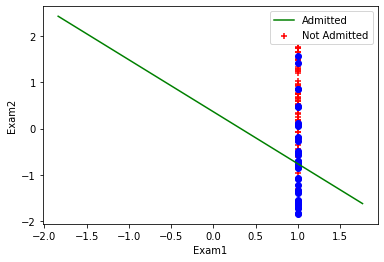

0.40648341423283
0.4064449685508987
0.4064089522444791
0.4063753599011409
0.40634418611495954
0.4063154254865695
0.40628907262321423
0.40626512213879973
0.4062435686539433
0.40622440679602567


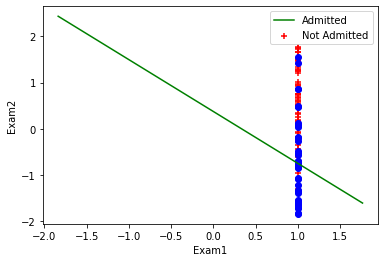

0.40620763119923936
0.4061932365046394
0.4061812173601914
0.4061715684208205
0.4061642843484586
0.4061593598120925
0.40615678948781087
0.4061565680588497
0.40615869021563966
0.40616315065585074


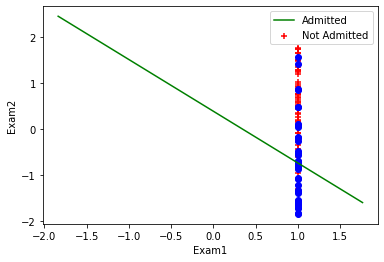

0.4061699440844376
0.40617906521368435
0.4061905087632473
0.4062042694602006
0.40622034203907775
0.40623872124191485
0.4062594018182932
0.40628237852537924
0.406307646127968
0.4063351993985229


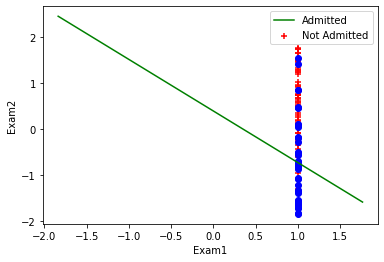

0.4063650331172147
0.40639714207196337
0.4064315210584768
0.40646816488028825
0.406507068348797
0.4065482262833042
0.4065916335110524
0.4066372848672595
0.40668517519515895
0.40673529934603303


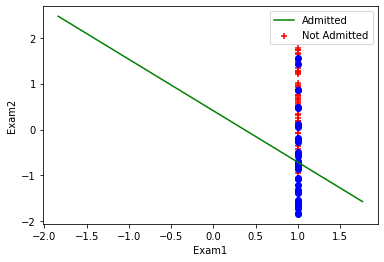

0.4067876521792501
0.40684222856229846
0.40689902337082173
0.40695803148865395
0.4070192478078512
0.40708266722872716
0.40714828465988456
0.40721609501824874
0.40728609322909803
0.4073582742260976


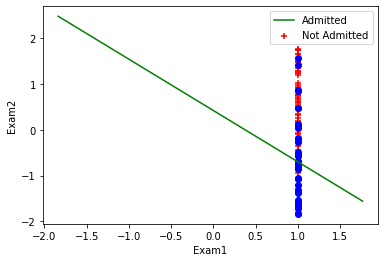

0.4074326329513279
0.4075091643553179
0.4075878633970734
0.40766872504410806
0.4077517442724723
0.40783691606678124
0.4079242354202461
0.408013697334698
0.40810529682061975
0.4081990288971705


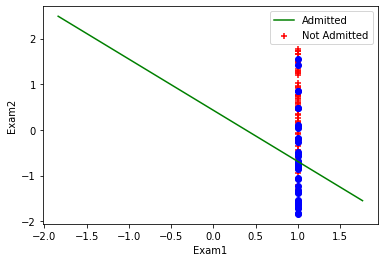

0.4082948885922133
0.4083928709423415
0.408492970992905
0.40859518379803433
0.4086995044206684
0.40880592793257625
0.4089144494143836
0.4090250639555957
0.40913776665462004
0.40925255261879173


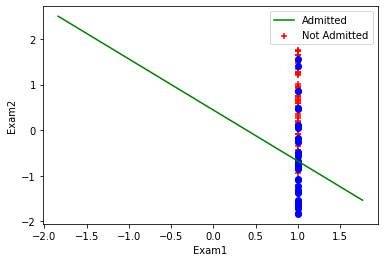

0.40936941696439433
0.4094883548166812
0.4096093613099005
0.4097324315873136
0.40985756080121766
0.4099847441129657
0.4101139766929878
0.4102452537208094
0.410378570385072
0.41051392188355207


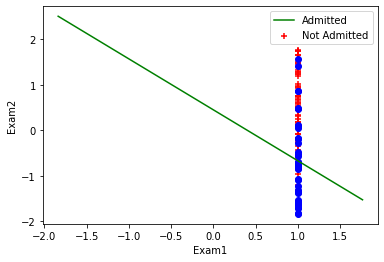

0.4106513034231795
0.41079071022005614
0.41093213749947327
0.41107558049592996
0.4112210344531495
0.41136849462409714
0.41151795627099547
0.4116694146653414
0.41182286508792076
0.41197830282882536


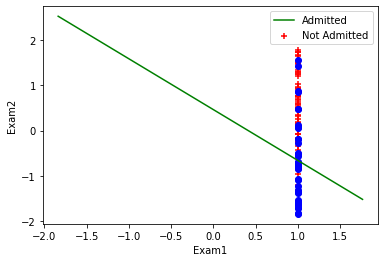

0.4121357231874665
0.4122951214725899
0.41245649300229054
0.41261983310402645
0.41278513711463083
0.41295240038032743
0.413121618256743
0.41329278610891756
0.4134658993113191
0.41364095324785444


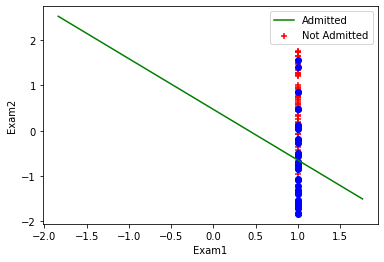

0.4138179433118815
0.41399686490621807
0.4141777134431556
0.41436048434446776
0.41454517304142163
0.41473177497478597
0.41492028559484295
0.41511070036139514
0.4153030147437758
0.4154972242208569


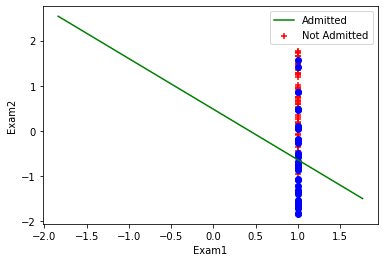

0.41569332428105704
0.41589131042234906
0.41609117815226926
0.41629292298792275
0.416496540455991
0.4167020260927394
0.41690937544402074
0.41711858406528585
0.4173296475215851
0.41754256138757584


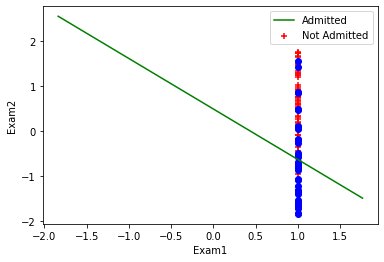

0.4177573212475273
0.417973922695324
0.4181923613344739
0.41841263277810803
0.4186347326489873
0.418858656579506
0.41908440021169396
0.41931195919722164
0.41954132919740034
0.41977250588318643


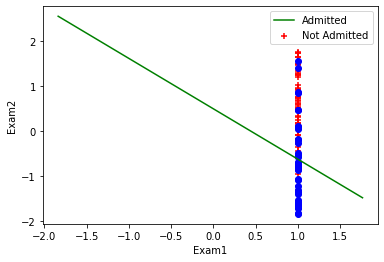

0.4200054849351846
0.4202402620436466
0.4204768329084764
0.42071519323922957
0.4209553387551155
0.42119726518499806
0.4214409682673953
0.4216864437504817
0.4219336873920866
0.4221826949596955


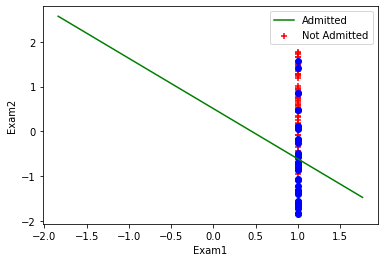

0.42243346223044886
0.4226859849911414
0.4229402590382219
0.4231962801777916
0.423454044225603
0.42371354700705816
0.4239747843572071
0.42423775212074616
0.42450244615201455
0.4247688623149925


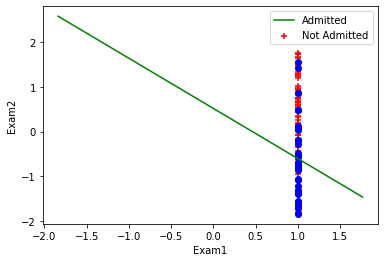

0.42503699648329796
0.4253068445401856
0.42557840237854067
0.42585166590087736
0.4261266310193348
0.4264032936556737
0.4266816497412701
0.4269616952171142
0.42724342603380316
0.42752683815153786


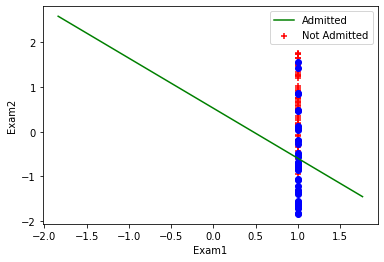

0.42781192754011754
0.428098690178934
0.4283871220569674
0.42867721917277996
0.42896897753450935
0.42926239315986514
0.42955746207611994
0.4298541803201043
0.4301525439382007
0.4304525489863346


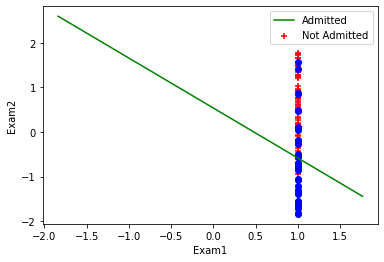

0.4307541915299708
0.4310574676441027
0.431362373413248
0.43166890493143895
0.43197705830221617
0.43228682963862
0.43259821506318236
0.4329112107079184
0.4332258127143192
0.43354201723334207


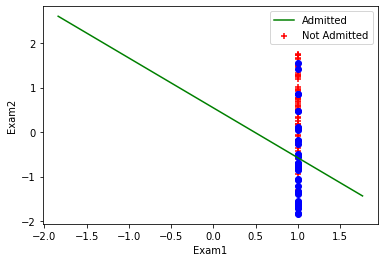

0.4338598204254022
0.4341792184603627
0.4345002075175281
0.4348227837856319
0.43514694346282945
0.43547268275668716
0.43579999788417284
0.43612888507164727
0.43645934055485164
0.4367913605788992


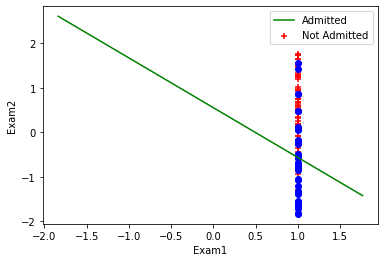

0.43712494139826436
0.4374600792767713
0.4377967704875854
0.43813501131319965
0.4384747980454269
0.43881612698538475
0.43915899444348805
0.43950339673943606
0.4398493302021996
0.4401967911700118


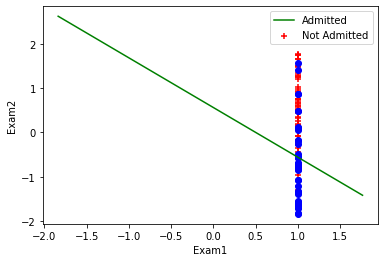

0.4405457759903538
0.44089628101994516
0.44124830262473025
0.44160183717986656
0.4419568810697117
0.44231343068781187
0.4426714824368899
0.4430310327288299
0.4433920779846664
0.4437546146345715


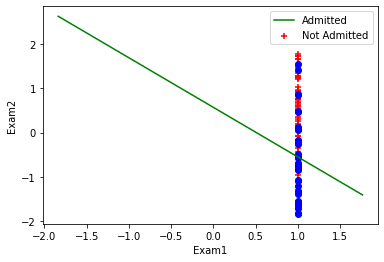

0.44411863911784166
0.4444841478828834
0.44485113738720106
0.4452196040973827
0.4455895444890875
0.44596095504703115
0.44633383226497314
0.44670817264570095
0.4470839727010181
0.44746122895173013


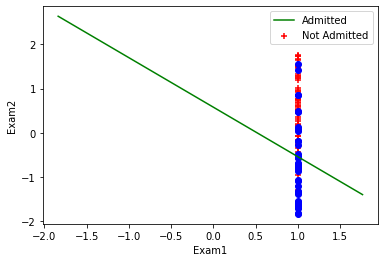

0.4478399379276279
0.44822009616747593
0.44860170021899737
0.44898474663885923
0.44936923199265655
0.44975515285490025
0.4501425058090013
0.45053128744725435
0.45092149437082535
0.4513131231897341


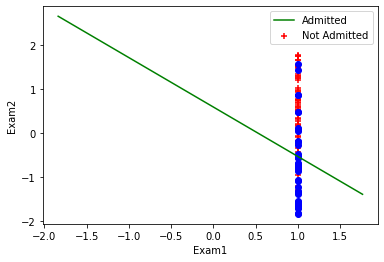

0.4517061705228408
0.4521006329978306
0.45249650725119667
0.45289378992822793
0.45329247768298997
0.4536925671783124
0.4540940550857712
0.45449693808567454
0.4549012128670454
0.45530687612760745


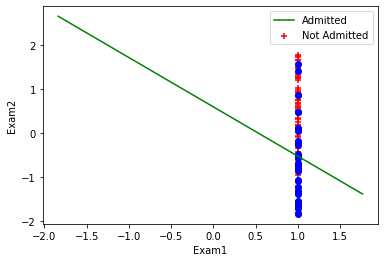

0.4557139245737681
0.45612235492060194
0.4565321638918362
0.45694334821983257
0.45735590464557313
0.4577698299186429
0.4581851207972124
0.45860177404802394
0.45901978644637204
0.4594391547760897


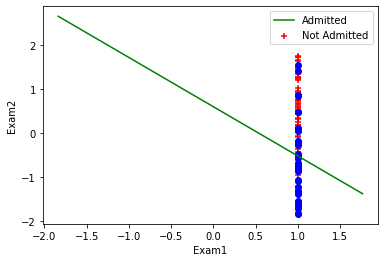

0.4598598758295295
0.4602819464075483
0.4607053633194898
0.4611301233831679
0.4615562234248502
0.4619836602792405
0.4624124307894615
0.46284253180703955
0.46327396019188605
0.4637067128122792


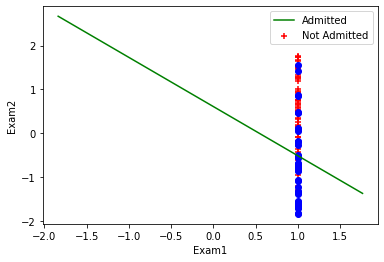

0.46414078654485025
0.4645761782745626
0.4650128848946971
0.4654509033068338
0.4658902304208335
0.4663308631548223
0.4667727984351726
0.4672160331964866
0.467660564381578
0.46810638894145484


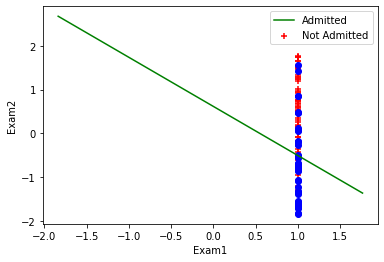

0.4685535038353016
0.46900190603046193
0.4694515925024194
0.4699025602347833
0.47035480621926573
0.4708083274556696
0.4712631209518651
0.47171918372377586
0.4721765127953592
0.4726351051985889


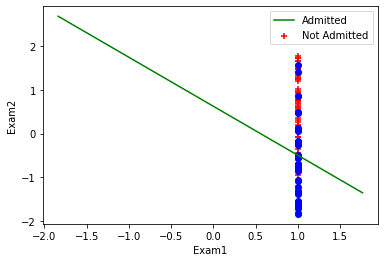

0.4730949579734368
0.4735560681678551
0.4740184328377574
0.47448204904700225
0.4749469138673739
0.4754130243785643
0.47588037766815516
0.47634897083159994
0.47681880097220536
0.47728986520111266


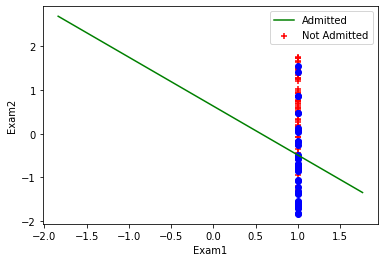

0.4777621606372813
0.4782356844074681
0.47871043364621124
0.4791864054958105
0.4796635971063096
0.4801420056354774
0.48062162824879073
0.48110246211941404
0.4815845044281831
0.4820677523635852


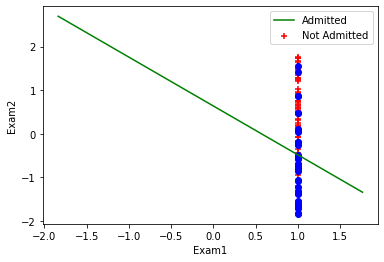

0.48255220312174174
0.4830378539063889
0.48352470192886
0.4840127444080659
0.4845019785704785
0.4849924016501106
0.4854840108884977
0.48597680353468103
0.48647077684518636
0.4869659280840085


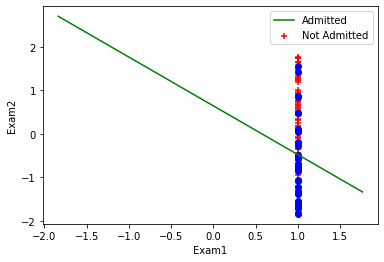

0.48746225452259045
0.4879597534398057
0.4884584221219411
0.4889582578626761
0.4894592579630655
0.48996141973152035
0.4904647404837914
0.4909692175429474
0.49147484823935883
0.4919816299106791


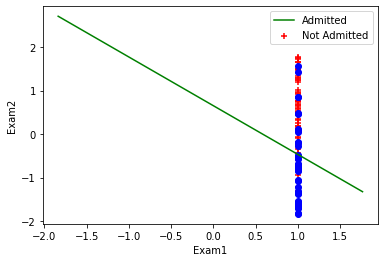

0.4924895599018256
0.4929986355649614
0.4935088542594763
0.4940202133519694
0.49453271021623013
0.49504634223321875
0.49556110679104953
0.49607700128497156
0.49659402311734957
0.4971121696976462


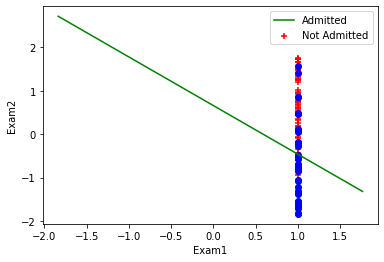

0.4976314384424047
0.4981518267752275
0.49867333212676074
0.49919595193467414
0.4997196836436435
0.5002445247053315
0.5007704725783697
0.5012975247283407
0.5018256786277582
0.5023549317560503


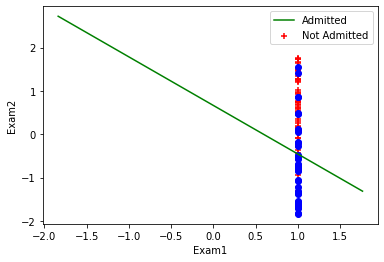

0.5028852815995407
0.5034167256514298
0.5039492614117768
0.5044828863874812
0.5050175980922649
0.5055533940466536
0.5060902717779586
0.5066282288202582
0.5071672627143806
0.5077073710078842


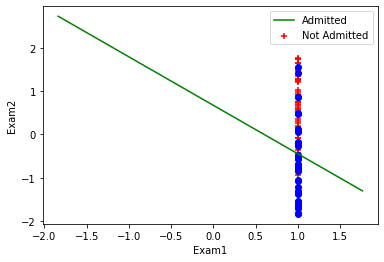

0.5082485512550399
0.5087908010168145
0.5093341178608498
0.509878499361446
0.5104239430995441
0.5109704466627067
0.5115180076451
0.5120666236474765
0.5126162922771572
0.5131670111480107


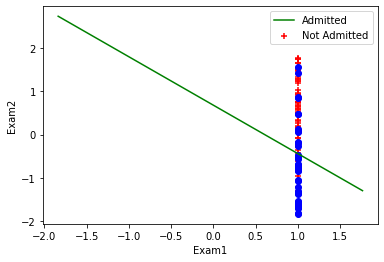

0.5137187778804395
0.5142715901013595
0.5148254454441817
0.5153803415487956
0.5159362760615503
0.5164932466352382
0.5170512509290741
0.5176102866086809
0.5181703513460687
0.5187314428196197


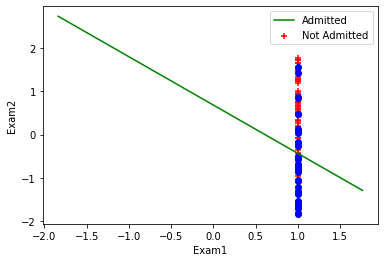

0.5192935587140688
0.5198566967204848
0.5204208545362564
0.5209860298650701
0.5215522204168961
0.5221194239079692
0.5226876380607693
0.5232568606040084
0.5238270892726079
0.5243983218076858


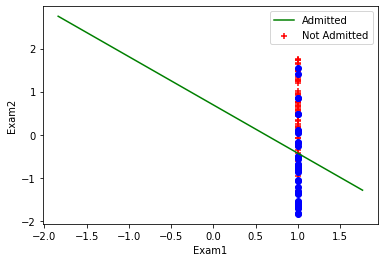

0.5249705559565342
0.525543789472607
0.5261180201154992
0.5266932456509297
0.5272694638507253
0.5278466724928018
0.5284248693611483
0.5290040522458082
0.5295842189428627


(array([[-1.39896109],
        [ 2.24983308],
        [ 2.00788917]]),
 [0.693147180559946,
  0.6916282011267486,
  0.69011430597859,
  0.6886054814428759,
  0.6871017139486074,
  0.6856029900263095,
  0.6841092963079416,
  0.682620619526783,
  0.681136946517292,
  0.679658264214948,
  0.6781845596560636,
  0.6767158199775818,
  0.6752520324168454,
  0.6737931843113499,
  0.6723392630984713,
  0.670890256315177,
  0.6694461515977141,
  0.6680069366812793,
  0.6665725993996674,
  0.6651431276849047,
  0.66371850956686,
  0.6622987331728385,
  0.6608837867271605,
  0.6594736585507195,
  0.6580683370605245,
  0.6566678107692269,
  0.6552720682846288,
  0.6538810983091797,
  0.6524948896394522,
  0.651113431165609,
  0.6497367118708491,
  0.6483647208308466,
  0.6469974472131689,
  0.6456348802766868,
  0.6442770093709698,
  0.6429238239356666,
  0.6415753134998796,
  0.640231467681518,
  0.6388922761866507,
  0.6375577288088379,
  0.63622781542846,
  0.634902526012029,
  0.633581850611497

In [79]:
gradientDescent(x,y,intial_theta,0.01,800)